In [7]:
import glob
import os
from tqdm import tqdm

video_folder_list = glob.glob("../hand_video_dataset_v2/*_*")
print(video_folder_list)
for video_folder in tqdm(video_folder_list):
    genre = video_folder.split("/")[-1].split("_")[0]
    video_list = glob.glob(f"{video_folder}/*/*.mp4")
    print(f"{genre} len = {len(video_list)}")

 33%|███▎      | 4/12 [00:00<00:00, 34.64it/s]

['../hand_video_dataset_v2/puzzle_videos', '../hand_video_dataset_v2/repair_videos', '../hand_video_dataset_v2/packing_videos', '../hand_video_dataset_v2/furniture_videos', '../hand_video_dataset_v2/food_videos', '../hand_video_dataset_v2/boardgame_videos', '../hand_video_dataset_v2/diy_videos', '../hand_video_dataset_v2/ffprobe_json', '../hand_video_dataset_v2/drink_videos', '../hand_video_dataset_v2/study_videos', '../hand_video_dataset_v2/gardening_videos', '../hand_video_dataset_v2/housework_videos']
puzzle len = 1947
repair len = 1919
packing len = 1925
furniture len = 1936
food len = 1918
boardgame len = 1848


100%|██████████| 12/12 [00:00<00:00, 38.47it/s]

diy len = 1969
ffprobe len = 0
drink len = 1911
study len = 798
gardening len = 996
housework len = 1906


In [1]:
import glob, json
from tqdm import tqdm

info_json_list = glob.glob("..//*/*_*.mp4")
print(len(info_json_list))
vid_list = [ item.split("/")[2].split("_", 2)[2][:-4] for item in info_json_list ]
print(len(vid_list))
print(vid_list[:10])
with open("picked_vid_2.txt", "w") as f:
    for item in vid_list:
        f.write(item + "\n")


20689
20689
['5cieBCDZH54', 'OzolvethwAU', 'uTx460w4ca4', 'EwyLZFJWtRI', '1WdyLT-ahX0', 'uesVG16EgNM', '-1nttENSWVE', 'NbZgUnRQT08', 'bWpvMMlzEHg', 'Y55NLrMjgm8']


In [8]:
import glob, json
from tqdm import tqdm

info_json_list = glob.glob("../hand_video_dataset_v2/ffprobe_json/*/*.json") #../hand_video_dataset_v2/ffprobe_json/{genre}_ffprob
print(len(info_json_list))

'''
duration is xxx(s)
1 total duration
2 duration distribution
3 resolution distribution
4 channel distribution (seperated, should be done using response json files)
'''
resolution_dict = {}
durarion_list = []

for item in info_json_list:
    info = json.load(open(item, "r"))
    #print(info["format"]["filename"])
    
    dura = int(float(info["streams"][0]["duration"])/60) # int minute
    durarion_list.append(dura)
    
    if "height" in info["streams"][0]:
        height = info["streams"][0]["height"]
    elif "height" in info["streams"][1]:
        height = info["streams"][1]["height"]
    else:
        height = 0
        
    if "width" in info["streams"][0]:
        width = info["streams"][0]["width"]
    elif "width" in info["streams"][1]:
        width = info["streams"][1]["width"]
    else:
        width = 0
    
    resolution = f"{width}x{height}"
    
    if resolution not in resolution_dict:
        resolution_dict[resolution] =  1
    else:
        resolution_dict[resolution] += 1
    
print(len(durarion_list))
print(resolution_dict)
print(len(resolution_dict))



19073
19073
{'1280x720': 15284, '640x352': 76, '640x360': 1290, '480x360': 1065, '960x720': 148, '490x360': 23, '568x320': 167, '1280x544': 1, '426x244': 1, '480x272': 19, '406x720': 35, '640x356': 27, '480x320': 26, '540x360': 90, '204x360': 2, '450x360': 20, '720x720': 46, '384x288': 15, '1252x720': 1, '480x270': 37, '640x350': 5, '600x360': 8, '480x300': 1, '492x360': 19, '512x288': 16, '468x360': 1, '636x360': 39, '638x360': 15, '1152x720': 9, '320x240': 174, '360x360': 34, '1272x720': 2, '1280x712': 2, '624x352': 2, '626x360': 10, '624x360': 1, '608x360': 7, '400x230': 2, '1270x720': 37, '1280x676': 7, '478x360': 3, '352x288': 6, '400x224': 4, '590x360': 2, '426x240': 13, '494x360': 1, '630x360': 3, '1200x720': 2, '160x120': 5, '628x360': 2, '1274x720': 5, '1280x540': 1, '1280x714': 15, '400x302': 1, '640x358': 17, '640x354': 6, '1280x718': 10, '1278x720': 8, '1212x720': 1, '474x360': 2, '634x360': 2, '1000x720': 1, '536x296': 1, '480x352': 3, '1080x720': 7, '1072x720': 1, '1164x7

min =  129499
hour =  2158.3166666666666
day =  89.92986111111111
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
9


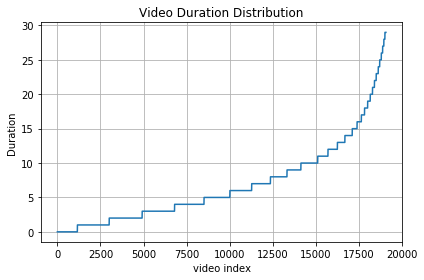

In [10]:
import matplotlib.pyplot as plt 
import matplotlib
import numpy as np
#matplotlib.use('Agg')
durarion_list.sort()
print("min = ", sum(durarion_list))
print("hour = ", sum(durarion_list)/60)
print("day = ", sum(durarion_list)/60/24)
print(durarion_list[:50])
print(durarion_list[int(len(durarion_list)*0.7)])
plt.plot(durarion_list)
plt.grid(True)
plt.title("Video Duration Distribution")
plt.xlabel("video index")
plt.ylabel("Duration")
plt.tight_layout()
plt.show()
 

In [11]:
print(durarion_list.index(1)/len(durarion_list))
print(durarion_list.index(2)/len(durarion_list))
print(durarion_list.index(3)/len(durarion_list))
print(durarion_list.index(5)/len(durarion_list))
print(durarion_list.index(31)/len(durarion_list))
print(durarion_list.index(41)/len(durarion_list))
print(durarion_list.index(51)/len(durarion_list))
print(durarion_list.index(61)/len(durarion_list))

0.06076652860063965
0.15760499134902742
0.2579038431290306
0.4462328946678551


ValueError: 31 is not in list

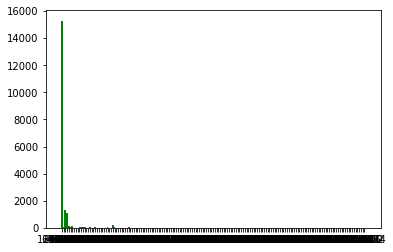

In [13]:
import matplotlib.pyplot as plt 
import matplotlib
#matplotlib.use('Agg')


plt.bar(resolution_dict.keys(), resolution_dict.values(), width=1.0, color='g')
plt.show()    

In [ ]:
import collections
sorted_resolution = sorted(resolution_dict.items(), key=lambda kv: kv[1], reverse=True)
sorted_resolution  = collections.OrderedDict(sorted_resolution)
list(sorted_resolution.keys())

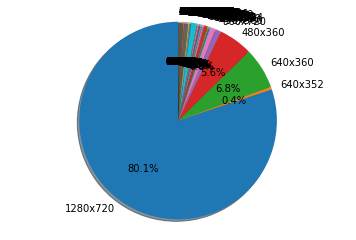

In [15]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(resolution_dict.keys())
sizes = list(resolution_dict.values())
#explode = (0.1, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()